# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Salma Amanda]
- **Email:** [salma.manda8@gmail.com]
- **ID Dicoding:** [amanda5]

## Menentukan Pertanyaan Bisnis

- Pada musim apa yang jumlah penyewa sepedanya paling banyak dan paling sedikit?
- Apakah kondisi cuaca mempengaruhi pengguna untuk menyewa sepeda?
- Pada working day, jenis pengguna apa yang menyewa lebih banyak? registered atau casual?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Meng-import library yang digunakan untuk kebutuhan analisis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset yang digunakan adalah dataset Bike Sharing Dataset. Karena kolom hour
tidak digunakan pada analisis ini, maka file csv yang digunakan adalah day.csv






In [2]:
# Membaca file day.csv
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Menampilkan 5 data teratas dari DataFrame day.csv

### Assessing Data

In [3]:
# Menilai data day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tipe data pada kolom dteday adalah object, seharusnya adalah datetime.
- Jumlah baris masing-masing kolom sama semua yaitu sebanyak 731, maka data sudah lengkap


In [4]:
# Mengecek kembali apakah ada data yang kosong

day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
Tidak ada data yang kosong.

In [5]:
# Mengecek apakah ada data yang duplikat

day_df.duplicated().sum()

0

**Insight:**
Tidak ada data yang duplikat.

In [6]:
# Mengecek apakah ada keanehan pada ringkasan parameter statistik

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [7]:
# Mengubah tipe data pada kolom dteday menjadi tipe data datetime

kolom_dteday = ["dteday"]

for column in kolom_dteday:
  day_df[column] = pd.to_datetime(day_df[column])

In [8]:
# Mengecek apakah tipe data sudah berhasil diubah

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Tipe data pada kolom dteday sudah berhasil diubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
# Eksplorasi data day_df

day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [10]:
# Mengelompokkan jumlah penyewa sepeda (terdaftar + kasual) berdasarkan musim

day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                            
         max   min         mean      sum
season                                  
1       7836   431  2604.132597   471348
2       8362   795  4992.331522   918589
3       8714  1115  5644.303191  1061129
4       8555    22  4728.162921   841613

**Insight:**
Rata-rata tertinggi dan jumlah penyewa terbanyak dihasilkan pada musim gugur(3). Sedangkan rata-rata terendah dan jumlah penyewa paling banyak dihasilkan pada musim semi (1)

In [11]:
# Mengelompokkan jumlah penyewa sepeda (terdaftar + kasual) berdasarkan cuaca

day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

**Insight:**
Rata-rata tertinggi dan jumlah penyewa terbanyak dihasilkan pada kondisi cuaca cerah, sedikit awan, berawan sebagian, berawan sebagian (1).

Pada kolom weathersit seharusnya ada 4 kategori, namun kategori 4 yaitu cuaca hujan lebat + butiran es + badai petir + kabut, salju + kabut tidak ada sama sekali pada data day.csv. Maka dapat disimpulkan tidak ada yang menyewa sepeda pada kondisi cuaca tersebut.

In [12]:
# Mengelompokkan jumlah penyewa sepeda (terdaftar + kasual) berdasarkan working day

day_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

**Insight:**
Rata-rata tertinggi dan jumlah penyewa terbanyak dihasilkan pada saat hari kerja (1) dibandingkan pada saat hari libur atau akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim apa yang menghasilkan jumlah penyewa sepedanya paling banyak dan yang paling sedikit?

<ipython-input-13-4bef7b8ebdf9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


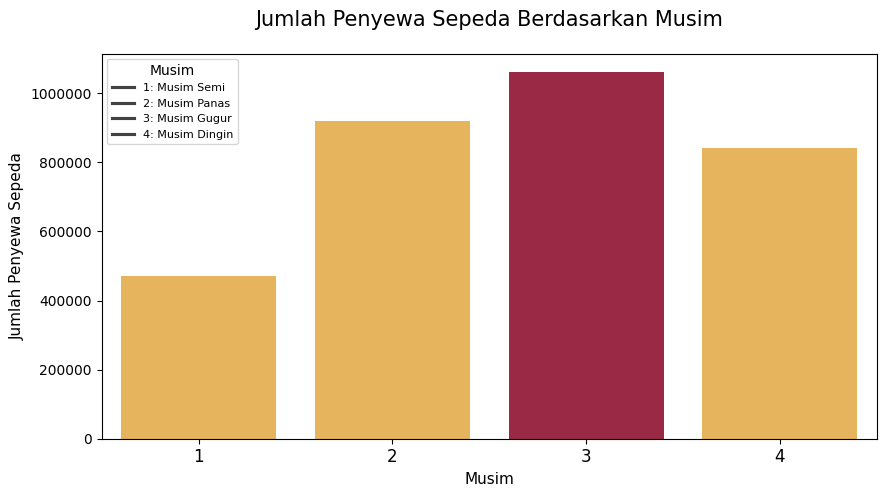

In [13]:
season_df = day_df.groupby(by="season").cnt.sum().reset_index()
season_df['season'] = pd.Categorical(season_df['season'], categories=[1, 2, 3, 4])
colors = ['#fdba45', '#fdba45', '#ac163b', '#fdba45']

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="season",
    data=season_df.sort_values(by="season", ascending=True),
    palette=colors
)

plt.title("Jumlah Penyewa Sepeda Berdasarkan Musim", loc="center", fontsize=15, pad=20)
plt.ylabel("Jumlah Penyewa Sepeda", fontsize=11)
plt.xlabel("Musim", fontsize=11)
plt.tick_params(axis='x', labelsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.legend(
    labels=["1: Musim Semi", "2: Musim Panas", "3: Musim Gugur", "4: Musim Dingin"],
    title="Musim",
    loc="upper left",
    fontsize=8,
    title_fontsize=10
)

plt.show()

**Insight**:
Berdasarkan hasil analisis dan visualisasi di atas, jumlah penyewa sepeda paling banyak dihasilkan pada saat musim gugur. Sedangkan jumlah penyewa paling sedikit dihasilkan pada saat musim semi.

### Pertanyaan 2: Apakah kondisi cuaca mempengaruhi pengguna untuk menyewa sepeda?

<ipython-input-14-bfd8c9218e1b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


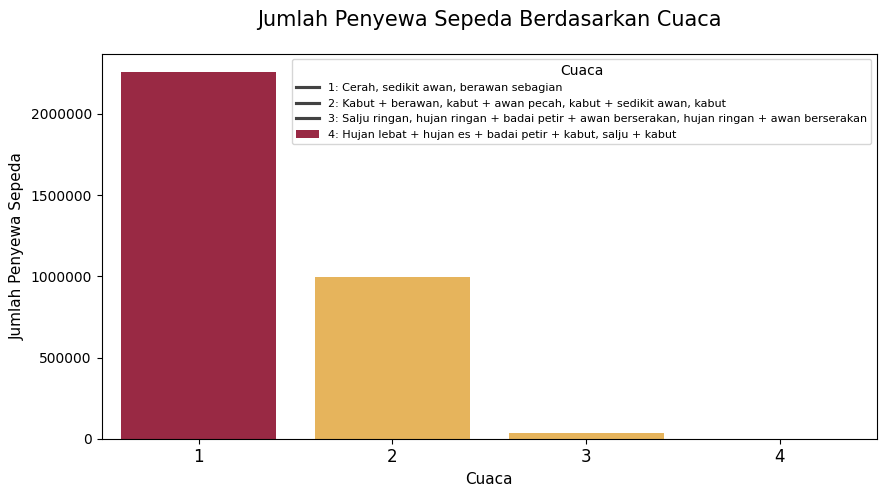

In [14]:
weather_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()
weather_df['weathersit'] = pd.Categorical(weather_df['weathersit'], categories=[1, 2, 3, 4])
colors = ['#ac163b', '#fdba45', '#fdba45', '#fdba45']

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="weathersit",
    data=weather_df.sort_values(by="weathersit", ascending=True),
    palette=colors
)

plt.title("Jumlah Penyewa Sepeda Berdasarkan Cuaca", loc="center", fontsize=15, pad=20)
plt.ylabel("Jumlah Penyewa Sepeda", fontsize=11)
plt.xlabel("Cuaca", fontsize=11)
plt.tick_params(axis='x', labelsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.legend(
    labels=["1: Cerah, sedikit awan, berawan sebagian",
            "2: Kabut + berawan, kabut + awan pecah, kabut + sedikit awan, kabut",
            "3: Salju ringan, hujan ringan + badai petir + awan berserakan, hujan ringan + awan berserakan",
            "4: Hujan lebat + hujan es + badai petir + kabut, salju + kabut"],
    title="Cuaca",
    loc="upper right",
    fontsize=8,
    title_fontsize=10
)

plt.show()

**Insight**:
Berdasarkan hasil analisis dan visualisasi di atas, kondisi cuaca mempengaruhi pengguna untuk menyewa sepeda. Para pengguna lebih banyak menyewa sepeda pada saat kondisi cuaca cerah, sedikit awan, berawan sebagian, berawan sebagian. Sedangkan pada saat kondisi cuaca hujan lebat + hujan es + badai petir + kabut, salju + kabut, sama sekali tidak ada yang menyewa sepeda.

### Pertanyaan 3: Pada working day, jenis pengguna apa yang menyewa lebih banyak? registered atau casual?

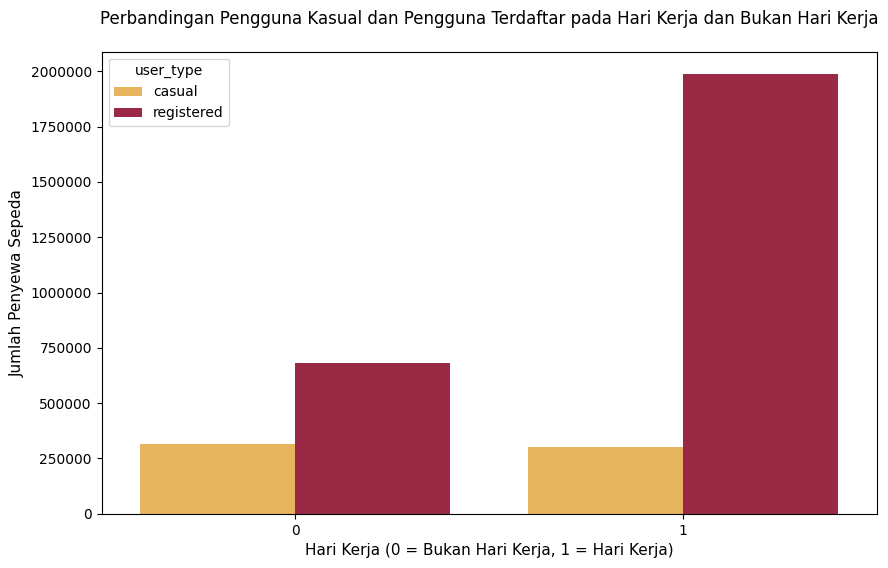

In [15]:
working_day_df = day_df.groupby(["workingday"]).agg({"casual": "sum", "registered": "sum"}).reset_index()
working_day_melted = working_day_df.melt(id_vars="workingday", value_vars=["casual", "registered"],
                                         var_name="user_type", value_name="count")
colors = {'casual': '#fdba45', 'registered': '#ac163b'}

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="workingday",
    y="count",
    hue="user_type",
    data=working_day_melted,
    palette=colors)

plt.title("Perbandingan Pengguna Kasual dan Pengguna Terdaftar pada Hari Kerja dan Bukan Hari Kerja", pad=20)
plt.xlabel("Hari Kerja (0 = Bukan Hari Kerja, 1 = Hari Kerja)", fontsize=11)
plt.ylabel("Jumlah Penyewa Sepeda", fontsize=11)
plt.ticklabel_format(style='plain', axis='y')

plt.show()



**Insight**:
Berdasarkan hasil analisis dan visualisasi di atas, jenis pengguna terdaftar/registered lebih banyak menyewa sepeda, baik pada saat hari kerja maupun saat akhir pekan dibandingkan dengan jenis pengguna kasual.

## Conclusion

- Kesimpulan pertanyaan 1: Jumlah penyewa sepeda paling banyak dihasilkan pada saat musim gugur yaitu sebanyak 1.061.129 penyewa. Sedangkan jumlah penyewa paling sedikit dihasilkan pada saat musim semi yaitu sebanyak 471.348 penyewa. Selisih jumlah penyewa antara kedua musim tersebut lumayan jauh, hal tersebut bisa terjadi karena cuaca, kondisi, atau suasana pada musim gugur lebih nyaman untuk aktivitas bersepeda dibandingkan pada saat musim semi.

- Kesimpulan pertanyaan 2: kondisi cuaca mempengaruhi pengguna untuk menyewa sepeda. Para pengguna lebih banyak menyewa sepeda pada saat kondisi cuaca cerah, sedikit awan, atau berawan sebagian, dengan jumlah penyewa sebanyak 2.257.952 penyewa. Sedangkan pada saat kondisi cuaca hujan lebat + hujan es + badai petir + kabut, atau salju + kabut, sama sekali tidak ada pengguna yang menyewa sepeda, dikarenakan pada saat kondisi cuaca tersebut lebih baik menggunakan kendaraan atau transportasi yang lebih aman seperti mobil, bis, atau kereta bawah tanah dibandingkan menggunakan sepeda yang cukup berbahaya.

- Kesimpulan pertanyaan 3: Jenis pengguna terdaftar/registered lebih banyak menyewa sepeda dibandingkan dengan jenis pengguna kasual, baik pada saat hari kerja maupun saat bukan hari kerja (akhir pekan atau hari libur) dengan jumlah penyewa sebanyak 1.989.125 pada hari kerja dan sebanyak 683.537 pada bukan hari kerja. Pengguna lebih banyak menyewa sepeda pada saat hari kerja, hal tersebut dapat disimpulkan bahwa para pengguna menyewa sepeda untuk kebutuhan pekerjaan, seperti pergi ke kantor atau pulang dari kantor.

  Jumlah penyewa pada jenis pengguna kasual lebih sedikit yaitu sebanyak 303.285 saat hari kerja dan sebanyak 316.732 saat bukan hari kerja. Hal tersebut bisa saja dikarenakan pengguna kasual menyewa sepeda untuk kebutuhan sementara, seperti liburan/rekreasi, kunjungan singkat ke suatu acara atau rumah teman, atau kebutuhan yang tidak bersifat jangka panjang.